In [1]:
from pandas import read_csv
from os.path import exists
import os
from dotenv import load_dotenv
from load_data import load_data as ld
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ld1 = ld.loaddata()
data_path = os.getenv('DATA_PATH')
file_name = 'train.csv'
file_path = data_path + file_name
if(exists(file_path)):
    df = ld1.load_data(file_name=file_path)
else:
    raise Exception("File:%s not found!"%(file_name))

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.drop('Id', axis=1, inplace=True)

# Log Transformation
df['SalePrice'] = np.log(df['SalePrice'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


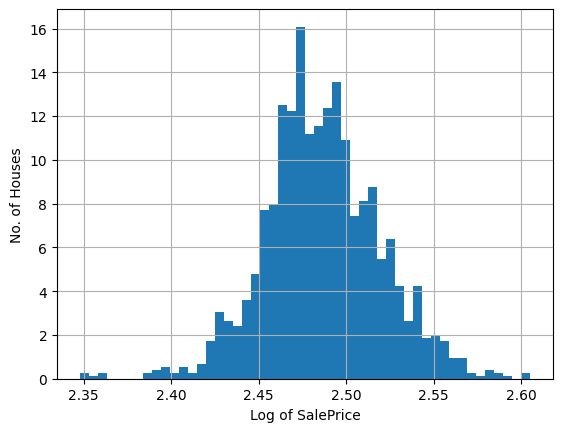

In [5]:
# After logtransformation
np.log(df['SalePrice']).hist(bins=50, density=True)
plt.xlabel("Log of SalePrice")
plt.ylabel("No. of Houses")
plt.show()

C:\Users\176706\AppData\Local\Temp\ipykernel_18296\2315813869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['SalePrice']), color='b', bins=100, hist_kws={'alpha':0.4})


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

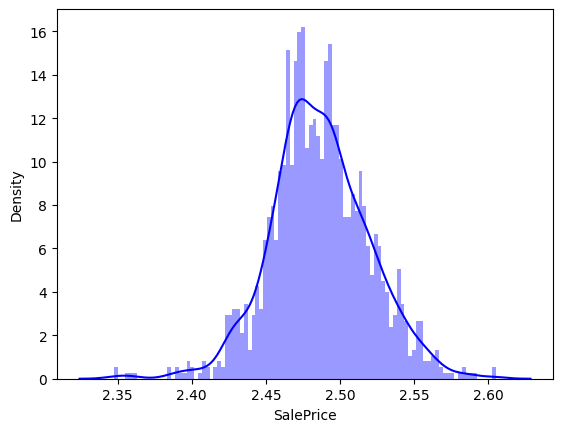

In [6]:

# Dist plot

sns.distplot(np.log(df['SalePrice']), color='b', bins=100, hist_kws={'alpha':0.4})


### Handling missing values

In [7]:
# List of varibales with missing values

var_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

df[var_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [8]:
var_with_na_greater_50 = [var for var in df.columns if df[var].isnull().mean() > 0.50]
df[var_with_na_greater_50].isnull().mean().sort_values(ascending=False)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
dtype: float64

In [9]:
len(df.columns)

80

In [10]:
# Droping the features that are having more than 50% missing data
df.drop(var_with_na_greater_50, axis=1, inplace=True)
len(df.columns)

76

In [11]:
# Handling skewed data of continuous variables
# first make a list with the super skewed variables

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

# capture the remaining continuous variables

cont_vars = [
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '2ndFlrSF',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

# capture the remaining continuous variables for log transformation

log_trans_var = [
    "LotFrontage", 
    "1stFlrSF", 
    "GrLivArea"
]

In [12]:
tot_cont_vars = skewed + cont_vars + log_trans_var

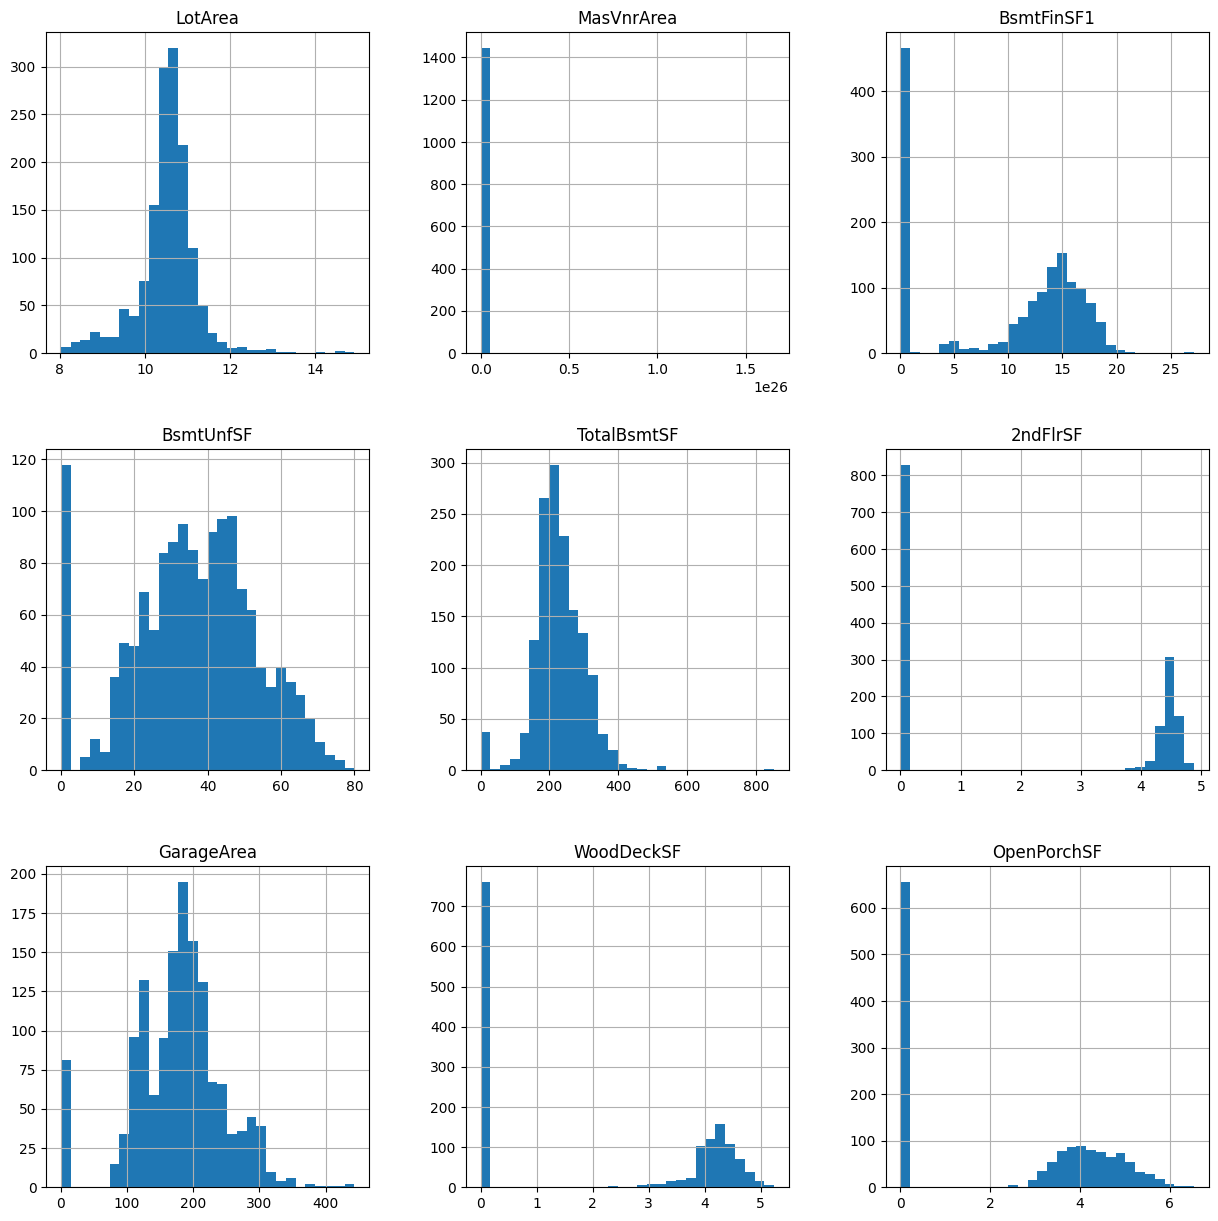

In [13]:
from scipy.stats import yeojohnson 
# distribution of varibale after Yeo-Johnson transformation
tmp = df.copy()

for var in cont_vars:
    # Transforming the variable
    tmp[var], param = yeojohnson(df[var])

# Ploting
tmp[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

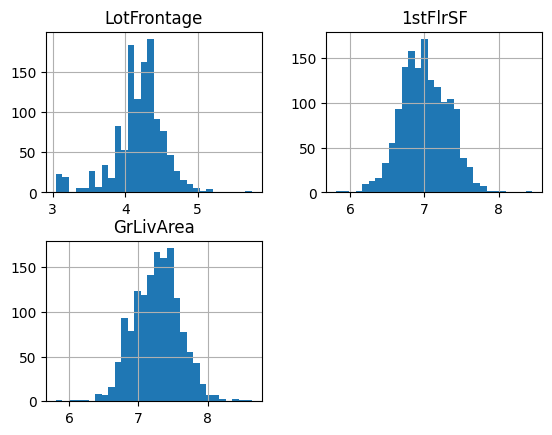

In [14]:
# Distribution of ["LotFrontage", "1stFlrSF", "GrLivArea"] after applying log transformation

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    # transform the variable with logarithm
    tmp[var] = np.log(df[var])

tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

In [15]:
tmp[tot_cont_vars].head()

,BsmtFinSF2,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,1stFlrSF,GrLivArea
0,0,0,0,0,0,0,10.427531,3.243669e+18,15.235368,20.452663,198.284295,4.527843,204.517915,-0.000000,4.227899,4.174387,6.752270,7.444249
1,0,0,0,0,0,0,10.596445,0.000000e+00,16.750863,28.330978,264.601145,-0.000000,177.329636,4.594581,0.000000,4.382027,7.140453,7.140453
2,0,0,0,0,0,0,10.807340,6.515698e+17,13.632899,35.046589,209.206786,4.533734,222.579733,-0.000000,3.844769,4.219508,6.824374,7.487734
3,0,0,272,0,0,0,10.589519,0.000000e+00,10.593524,39.069656,180.779930,4.475937,232.664362,-0.000000,3.659326,4.094345,6.867974,7.448334
4,0,0,0,0,0,0,11.124530,4.327077e+20,14.902456,37.229500,246.150776,4.615200,288.451992,4.310041,4.559556,4.430817,7.043160,7.695303


In [16]:
len(tot_cont_vars)

18

In [17]:
cont_with_target = tot_cont_vars + ['SalePrice']

In [18]:
# Correlation Visualization
tmp[cont_with_target].corr().style.background_gradient(cmap="Blues")

,BsmtFinSF2,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,1stFlrSF,GrLivArea,SalePrice
BsmtFinSF2,1.000000,0.014807,0.036543,-0.029993,0.088871,0.004940,0.093492,-0.010996,0.081826,-0.254973,0.108189,-0.116120,-0.010821,0.046965,-0.041211,0.041451,0.101010,-0.012767,0.004832
LowQualFinSF,0.014807,1.000000,0.061081,-0.004296,0.026799,-0.003793,0.012800,-0.004815,-0.058275,0.031263,-0.029425,0.034275,-0.080156,-0.031488,-0.008011,0.027552,-0.011407,0.108133,-0.037963
EnclosedPorch,0.036543,0.061081,1.000000,-0.037305,-0.082864,0.018361,0.009746,-0.013923,-0.098077,0.006918,-0.094107,0.086678,-0.124317,-0.141229,-0.153185,0.021446,-0.071352,0.003324,-0.149050
3SsnPorch,-0.029993,-0.004296,-0.037305,1.000000,-0.031436,0.000354,0.055409,-0.004652,0.039443,0.020148,0.036672,-0.024906,0.037427,-0.028848,0.021543,0.070257,0.059939,0.033093,0.054900
ScreenPorch,0.088871,0.026799,-0.082864,-0.031436,1.000000,0.031946,0.097066,0.078599,0.068618,0.000517,0.089319,0.019305,0.056676,-0.093139,0.022070,0.056067,0.102236,0.105955,0.121208
MiscVal,0.004940,-0.003793,0.018361,0.000354,0.031946,1.000000,0.047955,-0.003507,0.021190,-0.017546,-0.020444,0.005948,-0.026212,-0.016494,-0.029511,0.020849,-0.022118,-0.010052,-0.020021
LotArea,0.093492,0.012800,0.009746,0.055409,0.097066,0.047955,1.000000,0.012884,0.129669,0.063670,0.335993,-0.016912,0.315850,0.118905,0.138115,0.741133,0.466464,0.386194,0.400276
MasVnrArea,-0.010996,-0.004815,-0.013923,-0.004652,0.078599,-0.003507,0.012884,1.000000,0.032591,-0.003519,0.020487,0.043593,0.029664,-0.011325,0.007302,0.016002,0.009677,0.054531,0.059107
BsmtFinSF1,0.081826,-0.058275,-0.098077,0.039443,0.068618,0.021190,0.129669,0.032591,1.000000,-0.522506,0.346046,-0.213755,0.161479,0.097691,0.032996,0.089951,0.242412,0.018538,0.249298
BsmtUnfSF,-0.254973,0.031263,0.006918,0.020148,0.000517,-0.017546,0.063670,-0.003519,-0.522506,1.000000,0.425820,0.031344,0.142677,0.006514,0.191325,0.149540,0.254945,0.266015,0.212944


In [19]:
cont_corr_df = tmp[cont_with_target].corr()

In [20]:
cont_corr_df.head()

,BsmtFinSF2,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,1stFlrSF,GrLivArea,SalePrice
BsmtFinSF2,1.000000,0.014807,0.036543,-0.029993,0.088871,0.004940,0.093492,-0.010996,0.081826,-0.254973,0.108189,-0.116120,-0.010821,0.046965,-0.041211,0.041451,0.101010,-0.012767,0.004832
LowQualFinSF,0.014807,1.000000,0.061081,-0.004296,0.026799,-0.003793,0.012800,-0.004815,-0.058275,0.031263,-0.029425,0.034275,-0.080156,-0.031488,-0.008011,0.027552,-0.011407,0.108133,-0.037963
EnclosedPorch,0.036543,0.061081,1.000000,-0.037305,-0.082864,0.018361,0.009746,-0.013923,-0.098077,0.006918,-0.094107,0.086678,-0.124317,-0.141229,-0.153185,0.021446,-0.071352,0.003324,-0.149050
3SsnPorch,-0.029993,-0.004296,-0.037305,1.000000,-0.031436,0.000354,0.055409,-0.004652,0.039443,0.020148,0.036672,-0.024906,0.037427,-0.028848,0.021543,0.070257,0.059939,0.033093,0.054900
ScreenPorch,0.088871,0.026799,-0.082864,-0.031436,1.000000,0.031946,0.097066,0.078599,0.068618,0.000517,0.089319,0.019305,0.056676,-0.093139,0.022070,0.056067,0.102236,0.105955,0.121208


In [21]:
high_corr = {}
for idx in cont_corr_df.index:
    for col in cont_corr_df.columns:
        if(cont_corr_df[idx][col] > 0.5 or cont_corr_df[idx][col] < -0.5):
            if(col != idx):
                cols = idx + '-' + col
                high_corr[cols] = cont_corr_df[idx][col]
        elif(idx == 'SalePrice'):
            cols = idx + '-' + col
            high_corr[cols] = cont_corr_df[idx][col]

high_corr

{'LotArea-LotFrontage': 0.7411333472588298,
 'BsmtFinSF1-BsmtUnfSF': -0.5225060197189395,
 'BsmtUnfSF-BsmtFinSF1': -0.5225060197189395,
 'TotalBsmtSF-1stFlrSF': 0.7455043653888648,
 'TotalBsmtSF-SalePrice': 0.6128497876031084,
 '2ndFlrSF-GrLivArea': 0.5485434002628423,
 'GarageArea-SalePrice': 0.6474710410187534,
 'LotFrontage-LotArea': 0.7411333472588298,
 '1stFlrSF-TotalBsmtSF': 0.7455043653888648,
 '1stFlrSF-GrLivArea': 0.5459838062525584,
 '1stFlrSF-SalePrice': 0.6089466549036312,
 'GrLivArea-2ndFlrSF': 0.5485434002628423,
 'GrLivArea-1stFlrSF': 0.5459838062525584,
 'GrLivArea-SalePrice': 0.7302548511982276,
 'SalePrice-BsmtFinSF2': 0.004832410532046095,
 'SalePrice-LowQualFinSF': -0.03796280313742781,
 'SalePrice-EnclosedPorch': -0.14905028142767662,
 'SalePrice-3SsnPorch': 0.054900226467620085,
 'SalePrice-ScreenPorch': 0.12120760489686307,
 'SalePrice-MiscVal': -0.020020820155023808,
 'SalePrice-LotArea': 0.4002760328483741,
 'SalePrice-MasVnrArea': 0.059106590613597534,
 'SaleP

In [22]:
# Corr with SalePrice

'''
'SalePrice-BsmtFinSF2': 0.004832410532046095,
 'SalePrice-LowQualFinSF': -0.03796280313742781,
 'SalePrice-EnclosedPorch': -0.14905028142767662,
 'SalePrice-3SsnPorch': 0.054900226467620085,
 'SalePrice-ScreenPorch': 0.12120760489686307,
 'SalePrice-MiscVal': -0.020020820155023808,
 'SalePrice-LotArea': 0.4002760328483741,
 'SalePrice-MasVnrArea': 0.059106590613597534,
 'SalePrice-BsmtFinSF1': 0.2492984491827561,
 'SalePrice-BsmtUnfSF': 0.212944354433199,
 'SalePrice-TotalBsmtSF': 0.6128497876031084,
 'SalePrice-2ndFlrSF': 0.17002318436435673,
 'SalePrice-GarageArea': 0.6474710410187534,
 'SalePrice-WoodDeckSF': 0.3399975829401904,
 'SalePrice-OpenPorchSF': 0.45971732468273774,
 'SalePrice-LotFrontage': 0.3641082210486916,
 'SalePrice-1stFlrSF': 0.6089466549036312,
 'SalePrice-GrLivArea': 0.7302548511982276,
 'SalePrice-SalePrice': 1.0
'''

# Highly Corr Vars

'''

'LotArea-LotFrontage': 0.7411333472588298,
 'BsmtFinSF1-BsmtUnfSF': -0.5225060197189395,
 'BsmtUnfSF-BsmtFinSF1': -0.5225060197189395,
 'TotalBsmtSF-1stFlrSF': 0.7455043653888648,
 'TotalBsmtSF-SalePrice': 0.6128497876031084,
 '2ndFlrSF-GrLivArea': 0.5485434002628423,
 'GarageArea-SalePrice': 0.6474710410187534,
 'LotFrontage-LotArea': 0.7411333472588298,
 '1stFlrSF-TotalBsmtSF': 0.7455043653888648,
 '1stFlrSF-GrLivArea': 0.5459838062525584,
 '1stFlrSF-SalePrice': 0.6089466549036312,
 'GrLivArea-2ndFlrSF': 0.5485434002628423,
 'GrLivArea-1stFlrSF': 0.5459838062525584,
 'GrLivArea-SalePrice': 0.7302548511982276,

'''

# Need to remove
col_to_remove = ['LotFrontage', 'BsmtUnfSF', '2ndFlrSF', '1stFlrSF']
tmp.drop(col_to_remove, axis=1, inplace=True)
len(tmp.columns)

72

In [23]:
# Categorical varibales
cat_var = [var for var in df.columns if df[var].dtype=='O']

# By defination MSSubClass is also a categorical, despite its numeric values
cat_var.append('MSSubClass')
print(cat_var)

print('\n\nNo. of categorical varibales: ', len(cat_var))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass']


No. of categorical varibales:  40


### Chi-square test

In [24]:
# Chi-square test
chi_test_results = {}

from scipy.stats import chi2_contingency
import pandas as pd
for var1 in cat_var:
    for var2 in cat_var:
        ct_table = pd.crosstab(tmp[var1], tmp[var2])
        chi2_stat, p, dof, expected = chi2_contingency(ct_table)
        if(p >= 0.05):
            print(var1, ' ', var2)
            cols = var1 + "-" + var2
            chi_test_results[cols] = p
            print('---------------------')
            print(f"Ch2 Stat: {chi2_stat:.5g}")
            print(f"p-value: {p:.5g}")
            print(f"Degrees of freedom: {dof}")
            print(f"Expected Frequencies:\n", expected)
            print('---------------------\n\n')

MSZoning   Utilities
---------------------
Ch2 Stat: 0.26865
p-value: 0.99175
Degrees of freedom: 4
Expected Frequencies:
 [[9.99315068e+00 6.84931507e-03]
 [6.49554795e+01 4.45205479e-02]
 [1.59890411e+01 1.09589041e-02]
 [1.15021164e+03 7.88356164e-01]
 [2.17850685e+02 1.49315068e-01]]
---------------------


MSZoning   RoofMatl
---------------------
Ch2 Stat: 5.8568
p-value: 1
Degrees of freedom: 28
Expected Frequencies:
 [[6.84931507e-03 9.82191781e+00 6.84931507e-03 6.84931507e-03
  6.84931507e-03 7.53424658e-02 3.42465753e-02 4.10958904e-02]
 [4.45205479e-02 6.38424658e+01 4.45205479e-02 4.45205479e-02
  4.45205479e-02 4.89726027e-01 2.22602740e-01 2.67123288e-01]
 [1.09589041e-02 1.57150685e+01 1.09589041e-02 1.09589041e-02
  1.09589041e-02 1.20547945e-01 5.47945205e-02 6.57534247e-02]
 [7.88356164e-01 1.13050274e+03 7.88356164e-01 7.88356164e-01
  7.88356164e-01 8.67191781e+00 3.94178082e+00 4.73013699e+00]
 [1.49315068e-01 2.14117808e+02 1.49315068e-01 1.49315068e-01
  1.49315

LotShape   Utilities
---------------------
Ch2 Stat: 2.0179
p-value: 0.5687
Degrees of freedom: 3
Expected Frequencies:
 [[4.83668493e+02 3.31506849e-01]
 [4.09719178e+01 2.80821918e-02]
 [9.99315068e+00 6.84931507e-03]
 [9.24366438e+02 6.33561644e-01]]
---------------------


LotShape   Condition2
---------------------
Ch2 Stat: 16.186
p-value: 0.75913
Degrees of freedom: 21
Expected Frequencies:
 [[6.63013699e-01 1.98904110e+00 4.79027397e+02 3.31506849e-01
  6.63013699e-01 3.31506849e-01 3.31506849e-01 6.63013699e-01]
 [5.61643836e-02 1.68493151e-01 4.05787671e+01 2.80821918e-02
  5.61643836e-02 2.80821918e-02 2.80821918e-02 5.61643836e-02]
 [1.36986301e-02 4.10958904e-02 9.89726027e+00 6.84931507e-03
  1.36986301e-02 6.84931507e-03 6.84931507e-03 1.36986301e-02]
 [1.26712329e+00 3.80136986e+00 9.15496575e+02 6.33561644e-01
  1.26712329e+00 6.33561644e-01 6.33561644e-01 1.26712329e+00]]
---------------------


LotShape   RoofStyle
---------------------
Ch2 Stat: 20.475
p-value: 0.15

Utilities   Exterior1st
---------------------
Ch2 Stat: 5.5804
p-value: 0.97599
Degrees of freedom: 14
Expected Frequencies:
 [[1.99863014e+01 9.99315068e-01 1.99863014e+00 4.99657534e+01
  9.99315068e-01 6.09582192e+01 2.21847945e+02 9.99315068e-01
  2.19849315e+02 1.07926027e+02 1.99863014e+00 2.49828767e+01
  5.14647260e+02 2.05858904e+02 2.59821918e+01]
 [1.36986301e-02 6.84931507e-04 1.36986301e-03 3.42465753e-02
  6.84931507e-04 4.17808219e-02 1.52054795e-01 6.84931507e-04
  1.50684932e-01 7.39726027e-02 1.36986301e-03 1.71232877e-02
  3.52739726e-01 1.41095890e-01 1.78082192e-02]]
---------------------


Utilities   Exterior2nd
---------------------
Ch2 Stat: 6.0573
p-value: 0.97877
Degrees of freedom: 15
Expected Frequencies:
 [[1.99863014e+01 2.99794521e+00 6.99520548e+00 2.49828767e+01
  9.99315068e-01 5.99589041e+01 2.06858219e+02 9.99315068e+00
  2.13853425e+02 9.99315068e-01 1.41902740e+02 4.99657534e+00
  2.59821918e+01 5.03654795e+02 1.96865068e+02 3.79739726e+01]
 [1.36

LotConfig   Exterior1st
---------------------
Ch2 Stat: 72.028
p-value: 0.073269
Degrees of freedom: 56
Expected Frequencies:
 [[3.60273973e+00 1.80136986e-01 3.60273973e-01 9.00684932e+00
  1.80136986e-01 1.09883562e+01 3.99904110e+01 1.80136986e-01
  3.96301370e+01 1.94547945e+01 3.60273973e-01 4.50342466e+00
  9.27705479e+01 3.71082192e+01 4.68356164e+00]
 [1.28767123e+00 6.43835616e-02 1.28767123e-01 3.21917808e+00
  6.43835616e-02 3.92739726e+00 1.42931507e+01 6.43835616e-02
  1.41643836e+01 6.95342466e+00 1.28767123e-01 1.60958904e+00
  3.31575342e+01 1.32630137e+01 1.67397260e+00]
 [6.43835616e-01 3.21917808e-02 6.43835616e-02 1.60958904e+00
  3.21917808e-02 1.96369863e+00 7.14657534e+00 3.21917808e-02
  7.08219178e+00 3.47671233e+00 6.43835616e-02 8.04794521e-01
  1.65787671e+01 6.63150685e+00 8.36986301e-01]
 [5.47945205e-02 2.73972603e-03 5.47945205e-03 1.36986301e-01
  2.73972603e-03 1.67123288e-01 6.08219178e-01 2.73972603e-03
  6.02739726e-01 2.95890411e-01 5.47945205e-03 

LandSlope   MasVnrType
---------------------
Ch2 Stat: 12.532
p-value: 0.051097
Degrees of freedom: 6
Expected Frequencies:
 [[1.41942149e+01 4.21095041e+02 8.17586777e+02 1.21123967e+02]
 [6.71487603e-01 1.99207989e+01 3.86776860e+01 5.73002755e+00]
 [1.34297521e-01 3.98415978e+00 7.73553719e+00 1.14600551e+00]]
---------------------


LandSlope   ExterCond
---------------------
Ch2 Stat: 4.419
p-value: 0.81748
Degrees of freedom: 8
Expected Frequencies:
 [[2.83972603e+00 2.65041096e+01 1.38200000e+02 9.46575342e-01
  1.21350959e+03]
 [1.33561644e-01 1.24657534e+00 6.50000000e+00 4.45205479e-02
  5.70753425e+01]
 [2.67123288e-02 2.49315068e-01 1.30000000e+00 8.90410959e-03
  1.14150685e+01]]
---------------------


LandSlope   Foundation
---------------------
Ch2 Stat: 17.161
p-value: 0.070878
Degrees of freedom: 10
Expected Frequencies:
 [[1.38200000e+02 6.00128767e+02 6.12434247e+02 2.27178082e+01
  5.67945205e+00 2.83972603e+00]
 [6.50000000e+00 2.82260274e+01 2.88047945e+01 1.0684

Neighborhood   Heating
---------------------
Ch2 Stat: 141.11
p-value: 0.091359
Degrees of freedom: 120
Expected Frequencies:
 [[1.16438356e-02 1.66273973e+01 2.09589041e-01 8.15068493e-02
  2.32876712e-02 4.65753425e-02]
 [1.36986301e-03 1.95616438e+00 2.46575342e-02 9.58904110e-03
  2.73972603e-03 5.47945205e-03]
 [1.09589041e-02 1.56493151e+01 1.97260274e-01 7.67123288e-02
  2.19178082e-02 4.38356164e-02]
 [3.97260274e-02 5.67287671e+01 7.15068493e-01 2.78082192e-01
  7.94520548e-02 1.58904110e-01]
 [1.91780822e-02 2.73863014e+01 3.45205479e-01 1.34246575e-01
  3.83561644e-02 7.67123288e-02]
 [1.02739726e-01 1.46712329e+02 1.84931507e+00 7.19178082e-01
  2.05479452e-01 4.10958904e-01]
 [3.49315068e-02 4.98821918e+01 6.28767123e-01 2.44520548e-01
  6.98630137e-02 1.39726027e-01]
 [6.84931507e-02 9.78082192e+01 1.23287671e+00 4.79452055e-01
  1.36986301e-01 2.73972603e-01]
 [5.41095890e-02 7.72684932e+01 9.73972603e-01 3.78767123e-01
  1.08219178e-01 2.16438356e-01]
 [2.53424658e-02 3

Condition1   Functional
---------------------
Ch2 Stat: 39.661
p-value: 0.79867
Degrees of freedom: 48
Expected Frequencies:
 [[4.60273973e-01 1.64383562e-01 1.01917808e+00 1.11780822e+00
  4.93150685e-01 3.28767123e-02 4.47123288e+01]
 [7.76712329e-01 2.77397260e-01 1.71986301e+00 1.88630137e+00
  8.32191781e-01 5.54794521e-02 7.54520548e+01]
 [1.20821918e+01 4.31506849e+00 2.67534247e+01 2.93424658e+01
  1.29452055e+01 8.63013699e-01 1.17369863e+03]
 [7.67123288e-02 2.73972603e-02 1.69863014e-01 1.86301370e-01
  8.21917808e-02 5.47945205e-03 7.45205479e+00]
 [1.82191781e-01 6.50684932e-02 4.03424658e-01 4.42465753e-01
  1.95205479e-01 1.30136986e-02 1.76986301e+01]
 [1.05479452e-01 3.76712329e-02 2.33561644e-01 2.56164384e-01
  1.13013699e-01 7.53424658e-03 1.02465753e+01]
 [2.49315068e-01 8.90410959e-02 5.52054795e-01 6.05479452e-01
  2.67123288e-01 1.78082192e-02 2.42191781e+01]
 [1.91780822e-02 6.84931507e-03 4.24657534e-02 4.65753425e-02
  2.05479452e-02 1.36986301e-03 1.86301370

Condition2   GarageFinish
---------------------
Ch2 Stat: 15.297
p-value: 0.35817
Degrees of freedom: 14
Expected Frequencies:
 [[5.10514866e-01 6.12037708e-01 8.77447426e-01]
 [1.27628716e+00 1.53009427e+00 2.19361856e+00]
 [3.48426396e+02 4.17715736e+02 5.98857868e+02]
 [2.55257433e-01 3.06018854e-01 4.38723713e-01]
 [5.10514866e-01 6.12037708e-01 8.77447426e-01]
 [2.55257433e-01 3.06018854e-01 4.38723713e-01]
 [2.55257433e-01 3.06018854e-01 4.38723713e-01]
 [5.10514866e-01 6.12037708e-01 8.77447426e-01]]
---------------------


Condition2   GarageCond
---------------------
Ch2 Stat: 24.789
p-value: 0.63928
Degrees of freedom: 28
Expected Frequencies:
 [[2.90065265e-03 5.07614213e-02 1.30529369e-02 1.01522843e-02
  1.92313270e+00]
 [7.25163162e-03 1.26903553e-01 3.26323423e-02 2.53807107e-02
  4.80783176e+00]
 [1.97969543e+00 3.46446701e+01 8.90862944e+00 6.92893401e+00
  1.31253807e+03]
 [1.45032632e-03 2.53807107e-02 6.52646846e-03 5.07614213e-03
  9.61566352e-01]
 [2.90065265e-03 

RoofStyle   Heating
---------------------
Ch2 Stat: 22.497
p-value: 0.60689
Degrees of freedom: 25
Expected Frequencies:
 [[8.90410959e-03 1.27150685e+01 1.60273973e-01 6.23287671e-02
  1.78082192e-02 3.56164384e-02]
 [7.81506849e-01 1.11599178e+03 1.40671233e+01 5.47054795e+00
  1.56301370e+00 3.12602740e+00]
 [7.53424658e-03 1.07589041e+01 1.35616438e-01 5.27397260e-02
  1.50684932e-02 3.01369863e-02]
 [1.95890411e-01 2.79731507e+02 3.52602740e+00 1.37123288e+00
  3.91780822e-01 7.83561644e-01]
 [4.79452055e-03 6.84657534e+00 8.63013699e-02 3.35616438e-02
  9.58904110e-03 1.91780822e-02]
 [1.36986301e-03 1.95616438e+00 2.46575342e-02 9.58904110e-03
  2.73972603e-03 5.47945205e-03]]
---------------------


RoofStyle   HeatingQC
---------------------
Ch2 Stat: 12.61
p-value: 0.89348
Degrees of freedom: 20
Expected Frequencies:
 [[6.59794521e+00 4.36301370e-01 2.14589041e+00 8.90410959e-03
  3.81095890e+00]
 [5.79096575e+02 3.82938356e+01 1.88343151e+02 7.81506849e-01
  3.34484932e+02]


RoofMatl   Heating
---------------------
Ch2 Stat: 6.0353
p-value: 1
Degrees of freedom: 35
Expected Frequencies:
 [[6.84931507e-04 9.78082192e-01 1.23287671e-02 4.79452055e-03
  1.36986301e-03 2.73972603e-03]
 [9.82191781e-01 1.40256986e+03 1.76794521e+01 6.87534247e+00
  1.96438356e+00 3.92876712e+00]
 [6.84931507e-04 9.78082192e-01 1.23287671e-02 4.79452055e-03
  1.36986301e-03 2.73972603e-03]
 [6.84931507e-04 9.78082192e-01 1.23287671e-02 4.79452055e-03
  1.36986301e-03 2.73972603e-03]
 [6.84931507e-04 9.78082192e-01 1.23287671e-02 4.79452055e-03
  1.36986301e-03 2.73972603e-03]
 [7.53424658e-03 1.07589041e+01 1.35616438e-01 5.27397260e-02
  1.50684932e-02 3.01369863e-02]
 [3.42465753e-03 4.89041096e+00 6.16438356e-02 2.39726027e-02
  6.84931507e-03 1.36986301e-02]
 [4.10958904e-03 5.86849315e+00 7.39726027e-02 2.87671233e-02
  8.21917808e-03 1.64383562e-02]]
---------------------


RoofMatl   HeatingQC
---------------------
Ch2 Stat: 18.664
p-value: 0.90817
Degrees of freedom: 28


Exterior2nd   Street
---------------------
Ch2 Stat: 6.4045
p-value: 0.97212
Degrees of freedom: 15
Expected Frequencies:
 [[8.21917808e-02 1.99178082e+01]
 [1.23287671e-02 2.98767123e+00]
 [2.87671233e-02 6.97123288e+00]
 [1.02739726e-01 2.48972603e+01]
 [4.10958904e-03 9.95890411e-01]
 [2.46575342e-01 5.97534247e+01]
 [8.50684932e-01 2.06149315e+02]
 [4.10958904e-02 9.95890411e+00]
 [8.79452055e-01 2.13120548e+02]
 [4.10958904e-03 9.95890411e-01]
 [5.83561644e-01 1.41416438e+02]
 [2.05479452e-02 4.97945205e+00]
 [1.06849315e-01 2.58931507e+01]
 [2.07123288e+00 5.01928767e+02]
 [8.09589041e-01 1.96190411e+02]
 [1.56164384e-01 3.78438356e+01]]
---------------------


Exterior2nd   Utilities
---------------------
Ch2 Stat: 6.0573
p-value: 0.97877
Degrees of freedom: 15
Expected Frequencies:
 [[1.99863014e+01 1.36986301e-02]
 [2.99794521e+00 2.05479452e-03]
 [6.99520548e+00 4.79452055e-03]
 [2.49828767e+01 1.71232877e-02]
 [9.99315068e-01 6.84931507e-04]
 [5.99589041e+01 4.10958904e-02]


ExterCond   LotConfig
---------------------
Ch2 Stat: 9.6196
p-value: 0.88572
Degrees of freedom: 16
Expected Frequencies:
 [[5.40410959e-01 1.93150685e-01 9.65753425e-02 8.21917808e-03
  2.16164384e+00]
 [5.04383562e+00 1.80273973e+00 9.01369863e-01 7.67123288e-02
  2.01753425e+01]
 [2.63000000e+01 9.40000000e+00 4.70000000e+00 4.00000000e-01
  1.05200000e+02]
 [1.80136986e-01 6.43835616e-02 3.21917808e-02 2.73972603e-03
  7.20547945e-01]
 [2.30935616e+02 8.25397260e+01 4.12698630e+01 3.51232877e+00
  9.23742466e+02]]
---------------------


ExterCond   LandSlope
---------------------
Ch2 Stat: 4.419
p-value: 0.81748
Degrees of freedom: 8
Expected Frequencies:
 [[2.83972603e+00 1.33561644e-01 2.67123288e-02]
 [2.65041096e+01 1.24657534e+00 2.49315068e-01]
 [1.38200000e+02 6.50000000e+00 1.30000000e+00]
 [9.46575342e-01 4.45205479e-02 8.90410959e-03]
 [1.21350959e+03 5.70753425e+01 1.14150685e+01]]
---------------------


ExterCond   Condition1
---------------------
Ch2 Stat: 34.155
p-

BsmtCond   Street
---------------------
Ch2 Stat: 0.51476
p-value: 0.91564
Degrees of freedom: 3
Expected Frequencies:
 [[1.89739986e-01 4.48102600e+01]
 [2.74068869e-01 6.47259311e+01]
 [8.43288826e-03 1.99156711e+00]
 [5.52775826e+00 1.30547224e+03]]
---------------------


BsmtCond   Utilities
---------------------
Ch2 Stat: 0.085491
p-value: 0.99352
Degrees of freedom: 3
Expected Frequencies:
 [[4.49683767e+01 3.16233310e-02]
 [6.49543219e+01 4.56781448e-02]
 [1.99859452e+00 1.40548138e-03]
 [1.31007871e+03 9.21293043e-01]]
---------------------


BsmtCond   LotConfig
---------------------
Ch2 Stat: 15.55
p-value: 0.21275
Degrees of freedom: 12
Expected Frequencies:
 [[8.12719606e+00 2.90934645e+00 1.45467323e+00 1.26493324e-01
  3.23822909e+01]
 [1.17392832e+01 4.20238932e+00 2.10119466e+00 1.82712579e-01
  4.67744202e+01]
 [3.61208714e-01 1.29304287e-01 6.46521434e-02 5.62192551e-03
  1.43921293e+00]
 [2.36772312e+02 8.47589599e+01 4.23794800e+01 3.68517217e+00
  9.43404076e+02]]

BsmtFinType2   MSZoning
---------------------
Ch2 Stat: 28.545
p-value: 0.097122
Degrees of freedom: 20
Expected Frequencies:
 [[1.33614627e-01 8.68495077e-01 2.00421941e-01 1.49381153e+01
  2.85935302e+00]
 [2.32067511e-01 1.50843882e+00 3.48101266e-01 2.59451477e+01
  4.96624473e+00]
 [9.84528833e-02 6.39943741e-01 1.47679325e-01 1.10070323e+01
  2.10689170e+00]
 [3.23488045e-01 2.10267229e+00 4.85232068e-01 3.61659634e+01
  6.92264416e+00]
 [3.79746835e-01 2.46835443e+00 5.69620253e-01 4.24556962e+01
  8.12658228e+00]
 [8.83263010e+00 5.74120956e+01 1.32489451e+01 9.87488045e+02
  1.89018284e+02]]
---------------------


BsmtFinType2   LandContour
---------------------
Ch2 Stat: 11.535
p-value: 0.71386
Degrees of freedom: 15
Expected Frequencies:
 [[8.15049226e-01 6.68073136e-01 4.54289733e-01 1.70625879e+01]
 [1.41561181e+00 1.16033755e+00 7.89029536e-01 2.96350211e+01]
 [6.00562588e-01 4.92264416e-01 3.34739803e-01 1.25724332e+01]
 [1.97327707e+00 1.61744023e+00 1.09985935e+00 4.1

Heating   RoofStyle
---------------------
Ch2 Stat: 22.497
p-value: 0.60689
Degrees of freedom: 25
Expected Frequencies:
 [[8.90410959e-03 7.81506849e-01 7.53424658e-03 1.95890411e-01
  4.79452055e-03 1.36986301e-03]
 [1.27150685e+01 1.11599178e+03 1.07589041e+01 2.79731507e+02
  6.84657534e+00 1.95616438e+00]
 [1.60273973e-01 1.40671233e+01 1.35616438e-01 3.52602740e+00
  8.63013699e-02 2.46575342e-02]
 [6.23287671e-02 5.47054795e+00 5.27397260e-02 1.37123288e+00
  3.35616438e-02 9.58904110e-03]
 [1.78082192e-02 1.56301370e+00 1.50684932e-02 3.91780822e-01
  9.58904110e-03 2.73972603e-03]
 [3.56164384e-02 3.12602740e+00 3.01369863e-02 7.83561644e-01
  1.91780822e-02 5.47945205e-03]]
---------------------


Heating   RoofMatl
---------------------
Ch2 Stat: 6.0353
p-value: 1
Degrees of freedom: 35
Expected Frequencies:
 [[6.84931507e-04 9.82191781e-01 6.84931507e-04 6.84931507e-04
  6.84931507e-04 7.53424658e-03 3.42465753e-03 4.10958904e-03]
 [9.78082192e-01 1.40256986e+03 9.78082192e

CentralAir   Street
---------------------
Ch2 Stat: 3.387
p-value: 0.065714
Degrees of freedom: 1
Expected Frequencies:
 [[3.90410959e-01 9.46095890e+01]
 [5.60958904e+00 1.35939041e+03]]
---------------------


CentralAir   Utilities
---------------------
Ch2 Stat: 0
p-value: 1
Degrees of freedom: 1
Expected Frequencies:
 [[9.49349315e+01 6.50684932e-02]
 [1.36406507e+03 9.34931507e-01]]
---------------------


CentralAir   LandSlope
---------------------
Ch2 Stat: 0.19035
p-value: 0.90921
Degrees of freedom: 2
Expected Frequencies:
 [[8.99246575e+01 4.22945205e+00 8.45890411e-01]
 [1.29207534e+03 6.07705479e+01 1.21541096e+01]]
---------------------


CentralAir   Condition1
---------------------
Ch2 Stat: 10.368
p-value: 0.24011
Degrees of freedom: 8
Expected Frequencies:
 [[3.12328767e+00 5.27054795e+00 8.19863014e+01 5.20547945e-01
  1.23630137e+00 7.15753425e-01 1.69178082e+00 1.30136986e-01
  3.25342466e-01]
 [4.48767123e+01 7.57294521e+01 1.17801370e+03 7.47945205e+00
  1.77636

Functional   MSZoning
---------------------
Ch2 Stat: 19.197
p-value: 0.74143
Degrees of freedom: 24
Expected Frequencies:
 [[9.58904110e-02 6.23287671e-01 1.53424658e-01 1.10369863e+01
  2.09041096e+00]
 [3.42465753e-02 2.22602740e-01 5.47945205e-02 3.94178082e+00
  7.46575342e-01]
 [2.12328767e-01 1.38013699e+00 3.39726027e-01 2.44390411e+01
  4.62876712e+00]
 [2.32876712e-01 1.51369863e+00 3.72602740e-01 2.68041096e+01
  5.07671233e+00]
 [1.02739726e-01 6.67808219e-01 1.64383562e-01 1.18253425e+01
  2.23972603e+00]
 [6.84931507e-03 4.45205479e-02 1.09589041e-02 7.88356164e-01
  1.49315068e-01]
 [9.31506849e+00 6.05479452e+01 1.49041096e+01 1.07216438e+03
  2.03068493e+02]]
---------------------


Functional   Street
---------------------
Ch2 Stat: 0.443
p-value: 0.99846
Degrees of freedom: 6
Expected Frequencies:
 [[5.75342466e-02 1.39424658e+01]
 [2.05479452e-02 4.97945205e+00]
 [1.27397260e-01 3.08726027e+01]
 [1.39726027e-01 3.38602740e+01]
 [6.16438356e-02 1.49383562e+01]
 [4.10

FireplaceQu   BsmtCond
---------------------
Ch2 Stat: 8.1561
p-value: 0.41838
Degrees of freedom: 8
Expected Frequencies:
 [[  0.51379763   1.239159    21.24704336]
 [  0.73718791   1.77792378  30.4848883 ]
 [  8.39947438  20.25755585 347.34296978]
 [  0.42444152   1.02365309  17.55190539]
 [  6.92509855  16.70170828 286.37319317]]
---------------------


FireplaceQu   BsmtExposure
---------------------
Ch2 Stat: 16.36
p-value: 0.1753
Degrees of freedom: 12
Expected Frequencies:
 [[  3.66184211   3.05657895   2.05789474  14.22368421]
 [  5.25394737   4.38552632   2.95263158  20.40789474]
 [ 59.86315789  49.96842105  33.64210526 232.52631579]
 [  3.025        2.525        1.7         11.75      ]
 [ 49.19605263  41.06447368  27.64736842 191.09210526]]
---------------------


FireplaceQu   Heating
---------------------
Ch2 Stat: 20.441
p-value: 0.059197
Degrees of freedom: 12
Expected Frequencies:
 [[2.36571429e+01 2.49350649e-01 6.23376623e-02 3.11688312e-02]
 [3.25285714e+01 3.4285714

GarageCond   Street
---------------------
Ch2 Stat: 0.20058
p-value: 0.9953
Degrees of freedom: 4
Expected Frequencies:
 [[7.25163162e-03 1.99274837e+00]
 [1.26903553e-01 3.48730964e+01]
 [3.26323423e-02 8.96736766e+00]
 [2.53807107e-02 6.97461929e+00]
 [4.80783176e+00 1.32119217e+03]]
---------------------


GarageCond   LotShape
---------------------
Ch2 Stat: 16.096
p-value: 0.18688
Degrees of freedom: 12
Expected Frequencies:
 [[6.77302393e-01 5.94633793e-02 1.45032632e-02 1.24873096e+00]
 [1.18527919e+01 1.04060914e+00 2.53807107e-01 2.18527919e+01]
 [3.04786077e+00 2.67585207e-01 6.52646846e-02 5.61928934e+00]
 [2.37055838e+00 2.08121827e-01 5.07614213e-02 4.37055838e+00]
 [4.49051487e+02 3.94242204e+01 9.61566352e+00 8.27908629e+02]]
---------------------


GarageCond   LandContour
---------------------
Ch2 Stat: 3.1013
p-value: 0.99479
Degrees of freedom: 12
Expected Frequencies:
 [[7.83176215e-02 6.96156635e-02 4.78607687e-02 1.80420595e+00]
 [1.37055838e+00 1.21827411e+00 8.3

SaleType   LotShape
---------------------
Ch2 Stat: 12.912
p-value: 0.96755
Degrees of freedom: 24
Expected Frequencies:
 [[1.42547945e+01 1.20753425e+00 2.94520548e-01 2.72431507e+01]
 [1.32602740e+00 1.12328767e-01 2.73972603e-02 2.53424658e+00]
 [6.63013699e-01 5.61643836e-02 1.36986301e-02 1.26712329e+00]
 [2.98356164e+00 2.52739726e-01 6.16438356e-02 5.70205479e+00]
 [1.65753425e+00 1.40410959e-01 3.42465753e-02 3.16780822e+00]
 [1.65753425e+00 1.40410959e-01 3.42465753e-02 3.16780822e+00]
 [4.04438356e+01 3.42602740e+00 8.35616438e-01 7.72945205e+01]
 [9.94520548e-01 8.42465753e-02 2.05479452e-02 1.90068493e+00]
 [4.20019178e+02 3.55801370e+01 8.67808219e+00 8.02722603e+02]]
---------------------


SaleType   LandContour
---------------------
Ch2 Stat: 28.019
p-value: 0.25923
Degrees of freedom: 24
Expected Frequencies:
 [[1.85547945e+00 1.47260274e+00 1.06027397e+00 3.86116438e+01]
 [1.72602740e-01 1.36986301e-01 9.86301370e-02 3.59178082e+00]
 [8.63013699e-02 6.84931507e-02 4.9

SaleCondition   BsmtFinType2
---------------------
Ch2 Stat: 24.691
p-value: 0.4798
Degrees of freedom: 25
Expected Frequencies:
 [[1.33614627e+00 2.32067511e+00 9.84528833e-01 3.23488045e+00
  3.79746835e+00 8.83263010e+01]
 [4.00843882e-02 6.96202532e-02 2.95358650e-02 9.70464135e-02
  1.13924051e-01 2.64978903e+00]
 [1.20253165e-01 2.08860759e-01 8.86075949e-02 2.91139241e-01
  3.41772152e-01 7.94936709e+00]
 [2.67229255e-01 4.64135021e-01 1.96905767e-01 6.46976090e-01
  7.59493671e-01 1.76652602e+01]
 [1.55661041e+01 2.70358650e+01 1.14697609e+01 3.76863572e+01
  4.42405063e+01 1.02900141e+03]
 [1.67018284e+00 2.90084388e+00 1.23066104e+00 4.04360056e+00
  4.74683544e+00 1.10407876e+02]]
---------------------


SaleCondition   Heating
---------------------
Ch2 Stat: 8.5982
p-value: 0.99905
Degrees of freedom: 25
Expected Frequencies:
 [[6.91780822e-02 9.87863014e+01 1.24520548e+00 4.84246575e-01
  1.38356164e-01 2.76712329e-01]
 [2.73972603e-03 3.91232877e+00 4.93150685e-02 1.91780

In [25]:
chi_test_results

{'MSZoning-Utilities': 0.9917472273613425,
 'MSZoning-RoofMatl': 0.9999974089619902,
 'MSZoning-BsmtFinType2': 0.09712196562083024,
 'MSZoning-Functional': 0.7414276933358643,
 'MSZoning-FireplaceQu': 0.07805280463679216,
 'Street-LotShape': 0.19796136612247492,
 'Street-Utilities': 1.0,
 'Street-LotConfig': 0.842880187056049,
 'Street-Condition2': 0.9999995463032315,
 'Street-HouseStyle': 0.37390013047604437,
 'Street-RoofStyle': 0.9758161364086618,
 'Street-RoofMatl': 0.9999968624129736,
 'Street-Exterior1st': 0.9514721506851134,
 'Street-Exterior2nd': 0.9721226423124726,
 'Street-MasVnrType': 0.8826889279098873,
 'Street-ExterCond': 0.9813520615067869,
 'Street-Foundation': 0.16473935985925167,
 'Street-BsmtQual': 0.7083840022090302,
 'Street-BsmtCond': 0.9156377712406696,
 'Street-BsmtFinType1': 0.722820509039165,
 'Street-Heating': 0.9996604865549404,
 'Street-HeatingQC': 0.348164117653703,
 'Street-CentralAir': 0.06571372309414236,
 'Street-Electrical': 0.8864704604378693,
 'Stre

### Anova Test

In [26]:
for col in tmp.columns:
    print(tmp[col].dtype)

int64
object
float64
object
object
object
object
object
object
object
object
object
object
object
int64
int64
int64
int64
object
object
object
object
object
float64
object
object
object
object
object
object
object
float64
object
int64
float64
object
object
object
object
int64
float64
int64
int64
int64
int64
int64
int64
object
int64
object
int64
object
object
float64
object
int64
float64
object
object
object
float64
float64
int64
int64
int64
int64
int64
int64
int64
object
object
float64


!pip install statsmodels

import statsmodels.api as sm
independent_cols = ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
dependent_col = ['SalePrice']

for col in independent_cols:
    print(col)
    x = tmp[col].values.tolist()
    y = tmp[dependent_col].values.tolist()
    
    # adding constant term
    x = sm.add_constant(x)
    
    # performing regression and fitting the model
    result = sm.OLS(y, x).fit()
    print(result.summary())

In [27]:
tmp1 = tmp.copy()

import scipy.stats as stats
for var1 in tmp1.columns:
    for var2 in tmp1.columns:
        if(tmp1[var1].dtype==np.int64 or tmp1[var1].dtype==np.float64):
            if(tmp1[var2].dtype==object and var1!='MSSubClass' and var2!='MSSubClass'):
                if(var1!=var2):
                    if(len(tmp1[var2].unique())>=3):
                        print(tmp1[var2].dtype, tmp1[var1].dtype)
                        print(var1, var2)
                        F, p = stats.f_oneway(tmp1[var2], tmp1[var1])
                        print(var2, '<-->', var1)
                        print('--------------------')
                        print('F-stats=%.3f, p=%.3f' %(F, p))

                    
'''
        if(tmp[var1].dtype==np.int64 or tmp[var1].dtype==np.float64 and 
           tmp[var2].dtype==object and var1!='MSSubClass' and var2!='MSSubClass' and var1!=var2):
           '''
           

In [34]:
tmp3 = tmp.copy()
tmp4 = tmp3[cat_var]
tmp4.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,60
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,20
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,60
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,70
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,60


In [38]:
for col in tmp4.columns:
    print(tmp4[col].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [43]:
tmp.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'Scre

### Handling missing values

In [47]:
for var in tmp.columns:
    if(tmp[var].dtype==np.int64 or tmp[var].dtype==np.float64):
        if(var != 'MSSubClass'):
            tmp[var].fillna(tmp[var].mean(), inplace=True)
    else:
        tmp[var].fillna(tmp[var].mode()[0], inplace=True)

In [50]:
tmp['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [51]:
tmp.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10.524159,6.099315,5.575342,1971.267808,1984.865753,1.815990e+23,9.585676,46.549315,227.656989,...,2.017697,2.367526,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,42.300571,0.684708,1.382997,1.112799,30.202904,20.645407,4.536253e+24,7.086354,161.319273,72.724356,...,2.123867,2.210699,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,20.000000,8.025002,1.000000,1.000000,1872.000000,1950.000000,0.000000e+00,0.000000,0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,20.000000,10.279607,5.000000,5.000000,1954.000000,1967.000000,0.000000e+00,0.000000,0.000000,187.805957,...,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,50.000000,10.579554,6.000000,5.000000,1973.000000,1994.000000,0.000000e+00,12.685519,0.000000,221.178164,...,-0.000000,3.320681,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,70.000000,10.848369,7.000000,6.000000,2000.000000,2004.000000,8.850460e+17,15.274878,0.000000,270.225865,...,4.221773,4.340207,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,190.000000,14.926126,10.000000,9.000000,2010.000000,2010.000000,1.659761e+26,27.162515,1474.000000,852.174681,...,5.240922,6.543559,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473


In [52]:
# Correlation Visualization
tmp.corr().style.background_gradient(cmap="Blues")

C:\Users\176706\AppData\Local\Temp\ipykernel_18296\1907277298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tmp.corr().style.background_gradient(cmap="Blues")


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.455390,0.032628,-0.059316,0.027850,0.040581,0.005230,-0.049302,-0.065649,-0.235873,0.046474,0.081717,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098883,0.021265,-0.000468,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotArea,-0.455390,1.000000,0.178652,-0.006689,0.022836,0.028055,0.012842,0.129669,0.093492,0.335993,0.012800,0.386194,0.140164,0.045687,0.179991,0.040021,0.277122,0.000684,0.359302,0.330052,-0.019440,0.272002,0.315850,0.118905,0.138115,0.009746,0.055409,0.097066,0.092949,0.047955,0.010053,-0.027231,0.400276
OverallQual,0.032628,0.178652,1.000000,-0.091932,0.572323,0.550684,0.046685,0.090503,-0.059119,0.533131,-0.030429,0.614210,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.555759,0.282626,0.444734,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184
OverallCond,-0.059316,-0.006689,-0.091932,1.000000,-0.375983,0.073741,-0.017994,0.030130,0.040229,-0.153228,0.025494,-0.101965,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.143098,-0.040162,-0.100351,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.022836,0.572323,-0.375983,1.000000,0.592855,0.032336,0.175271,-0.049107,0.385847,-0.183784,0.235518,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.482114,0.308400,0.388026,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.028055,0.550684,0.073741,0.592855,1.000000,0.022715,0.034695,-0.067759,0.292759,-0.062419,0.311464,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.364322,0.286982,0.382061,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.005230,0.012842,0.046685,-0.017994,0.032336,0.022715,1.000000,0.032480,-0.010994,0.020414,-0.004815,0.054405,-0.013143,-0.002125,0.047744,0.044385,0.016154,-0.008306,0.029619,0.029006,0.028680,0.027413,0.029627,-0.011293,0.007277,-0.013878,-0.004651,0.078583,-0.001938,-0.003507,-0.006191,-0.028605,0.058931
BsmtFinSF1,-0.049302,0.129669,0.090503,0.030130,0.175271,0.034695,0.032480,1.000000,0.081826,0.346046,-0.058275,0.018538,0.626813,0.101579,-0.059976,-0.001922,-0.099296,-0.126864,-0.069731,0.172532,0.051020,0.104727,0.161479,0.097691,0.032996,-0.098077,0.039443,0.068618,0.049498,0.021190,-0.024595,0.030161,0.249298
BsmtFinSF2,-0.065649,0.093492,-0.059119,0.040229,-0.049107,-0.067759,-0.010994,0.081826,1.000000,0.108189,0.014807,-0.012767,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087126,-0.038264,-0.010821,0.046965,-0.041211,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832
TotalBsmtSF,-0.235873,0.335993,0.533131,-0.153228,0.385847,0.292759,0.020414,0.346046,0.108189,1.000000,-0.029425,0.418833,0.310136,0.006592,0.303123,-0.033546,0.052181,-0.103211,0.267060,0.329786,0.304007,0.425638,0.456263,0.218030,0.287186,-0.094107,0.036672,0.089319,0.101015,-0.020444,0.017548,-0.019522,0.612850


In [53]:
# Highly correlated features
high_correlation_var = tmp.corr().index[abs(tmp.corr()['SalePrice'])>0.5]
high_correlation_var

C:\Users\176706\AppData\Local\Temp\ipykernel_18296\1538478906.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_correlation_var = tmp.corr().index[abs(tmp.corr()['SalePrice'])>0.5]


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

We are using those higly correlated features with target variable

In [56]:
# Correlation Visualization
tmp[high_correlation_var].corr().style.background_gradient(cmap="Blues")

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.533131,0.614210,0.550600,0.427452,0.518018,0.600671,0.555759,0.817184
YearBuilt,0.572323,1.000000,0.592855,0.385847,0.235518,0.468271,0.095589,0.780555,0.537850,0.482114,0.586570
YearRemodAdd,0.550684,0.592855,1.000000,0.292759,0.311464,0.439046,0.191740,0.618130,0.420622,0.364322,0.565608
TotalBsmtSF,0.533131,0.385847,0.292759,1.000000,0.418833,0.303123,0.267060,0.304007,0.425638,0.456263,0.612850
GrLivArea,0.614210,0.235518,0.311464,0.418833,1.000000,0.653160,0.825498,0.239676,0.496132,0.468082,0.730255
FullBath,0.550600,0.468271,0.439046,0.303123,0.653160,1.000000,0.554784,0.468466,0.469672,0.398395,0.594771
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.267060,0.825498,0.554784,1.000000,0.140791,0.362289,0.324323,0.534422
GarageYrBlt,0.518018,0.780555,0.618130,0.304007,0.239676,0.468466,0.140791,1.000000,0.482534,0.455769,0.500449
GarageCars,0.600671,0.537850,0.420622,0.425638,0.496132,0.469672,0.362289,0.482534,1.000000,0.894847,0.680625
GarageArea,0.555759,0.482114,0.364322,0.456263,0.468082,0.398395,0.324323,0.455769,0.894847,1.000000,0.647471


In [57]:
# Skewness
from scipy.stats import skew
for col in tmp[high_correlation_var].corr().columns:
    print("{0:20s} : {1:10.5f}".format(col, skew(tmp[col])))

OverallQual          :    0.21672
YearBuilt            :   -0.61283
YearRemodAdd         :   -0.50304
TotalBsmtSF          :    0.23230
GrLivArea            :   -0.00699
FullBath             :    0.03652
TotRmsAbvGrd         :    0.67565
GarageYrBlt          :   -0.66749
GarageCars           :   -0.34220
GarageArea           :   -0.32790
SalePrice            :    0.12121


array([[<AxesSubplot: title={'center': 'OverallQual'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'YearRemodAdd'}>],
       [<AxesSubplot: title={'center': 'TotalBsmtSF'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'FullBath'}>],
       [<AxesSubplot: title={'center': 'TotRmsAbvGrd'}>,
        <AxesSubplot: title={'center': 'GarageYrBlt'}>,
        <AxesSubplot: title={'center': 'GarageCars'}>],
       [<AxesSubplot: title={'center': 'GarageArea'}>,
        <AxesSubplot: title={'center': 'SalePrice'}>, <AxesSubplot: >]],
      dtype=object)

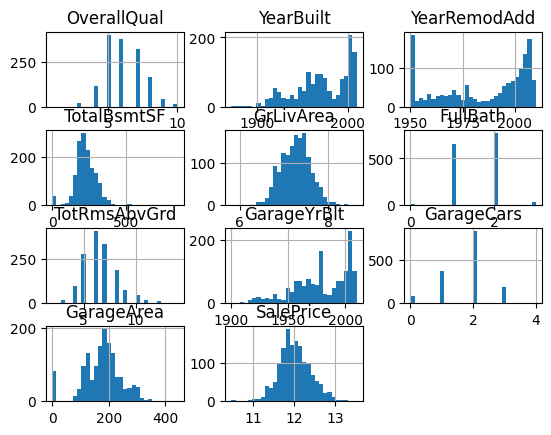

In [59]:
tmp[high_correlation_var].hist(bins=30)

<AxesSubplot: >

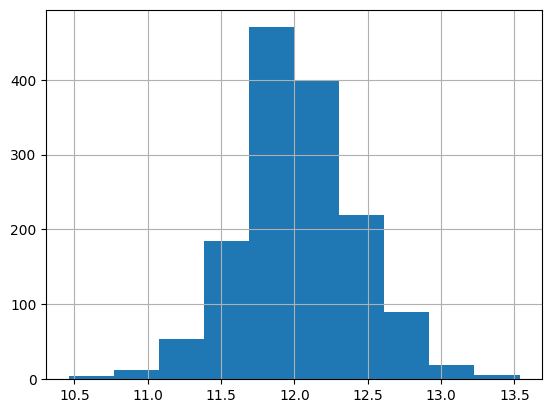

In [60]:
tmp['SalePrice'].hist()

Among the the high correlation features YearBuilt, YearRemodAdd and GarageCars lack symmetry distribution the most

log transformation can remove skewness

### Log transformation

In [61]:
tmp_log_df = tmp[high_correlation_var].corr().copy()

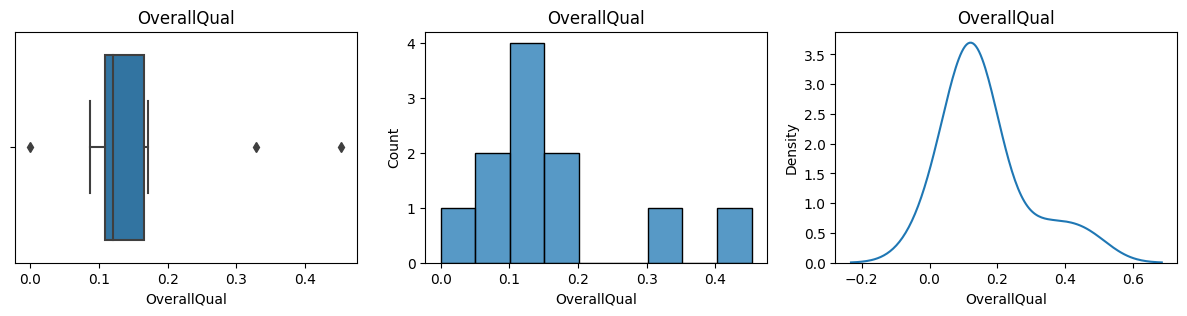

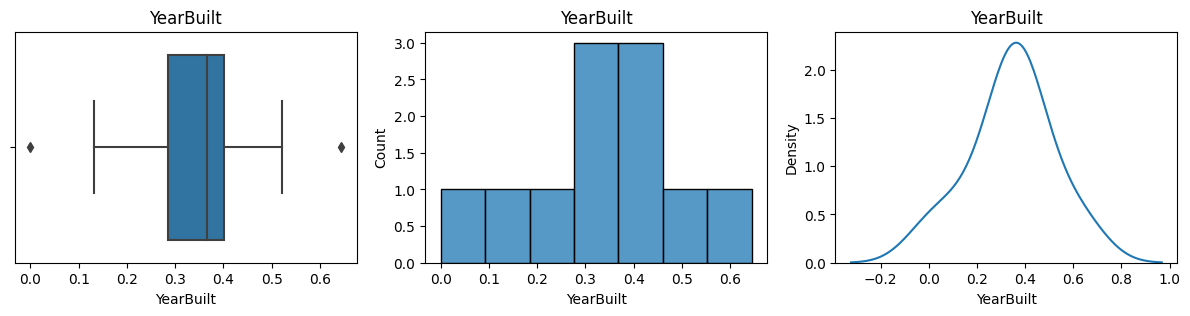

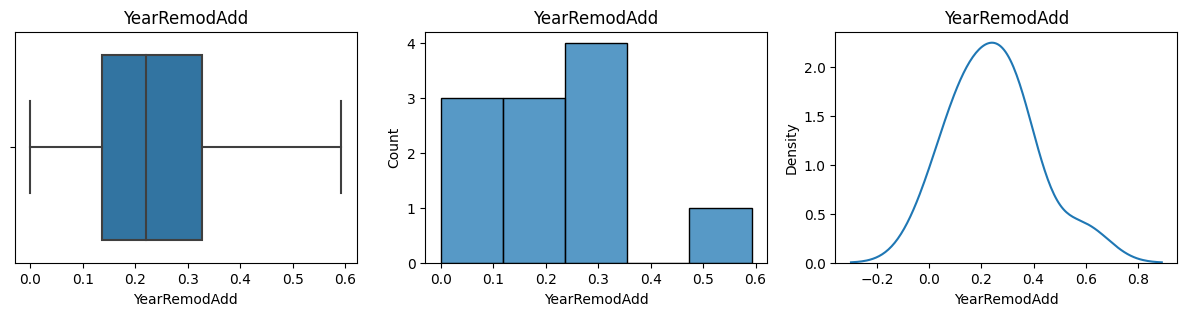

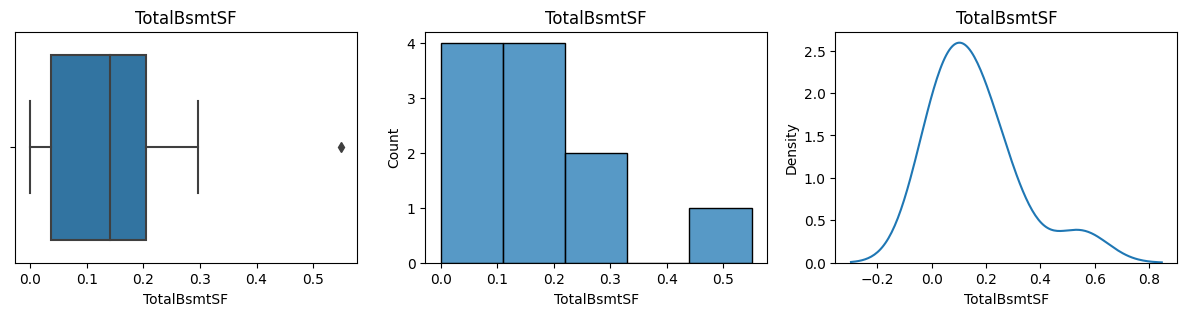

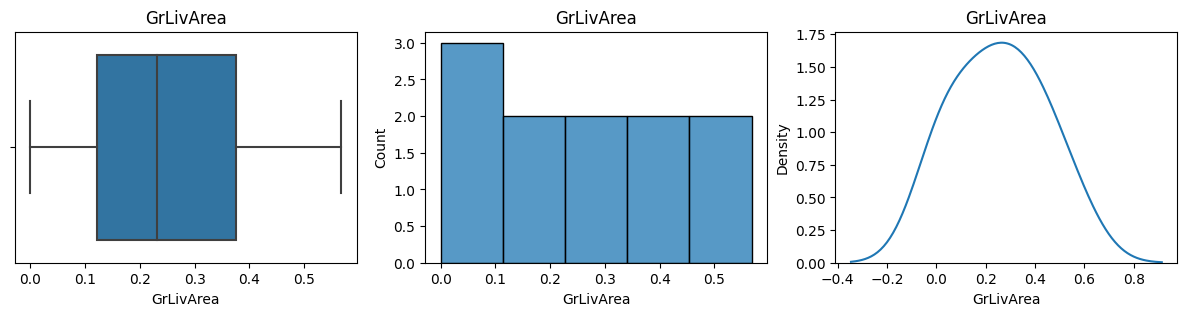

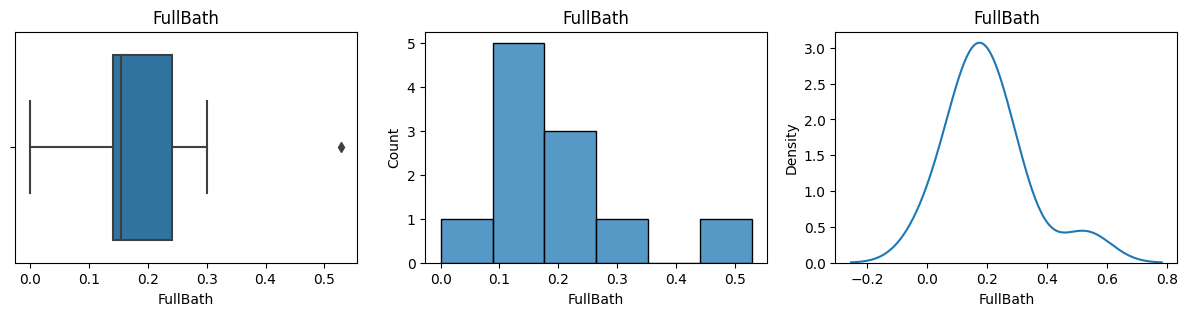

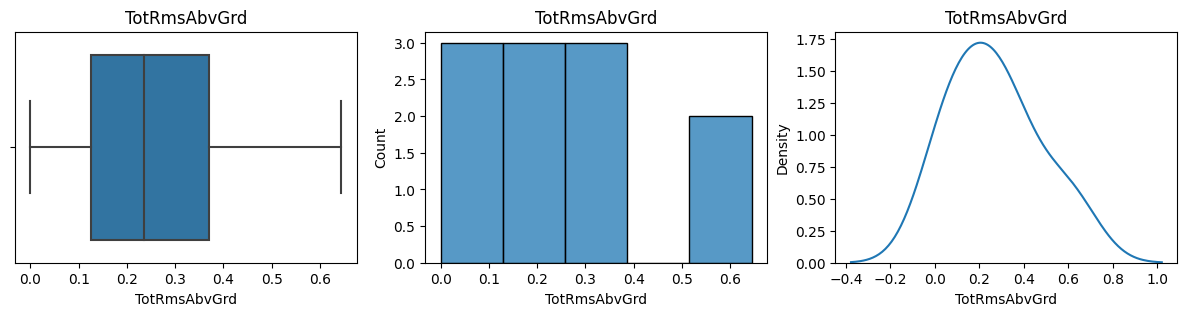

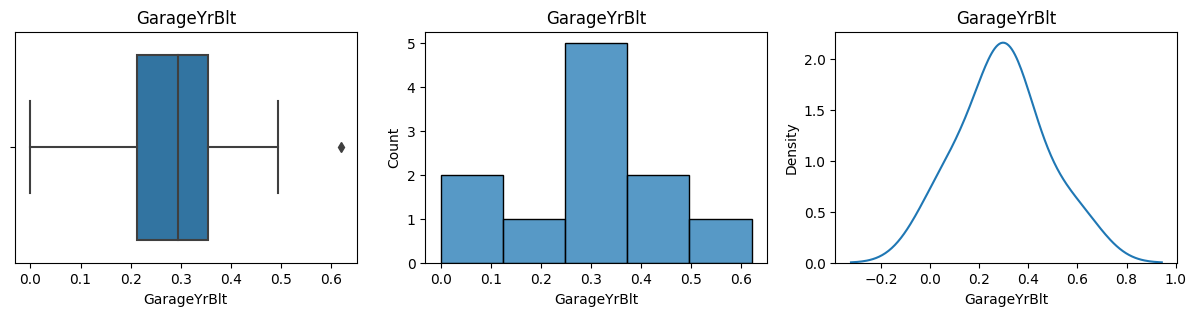

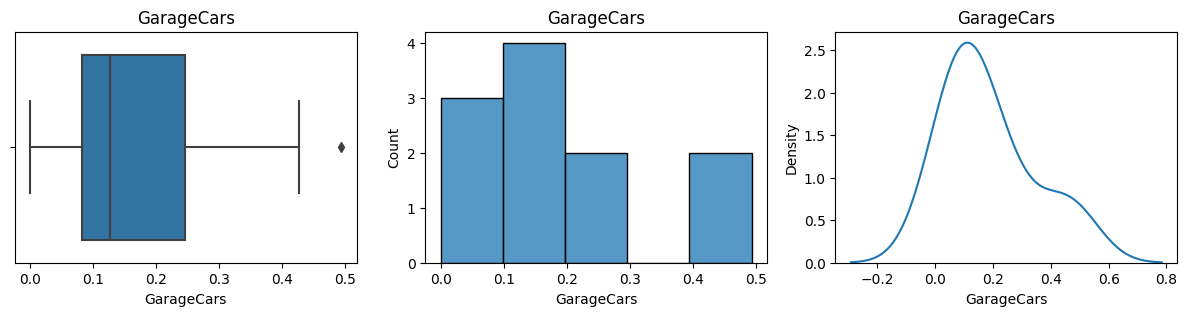

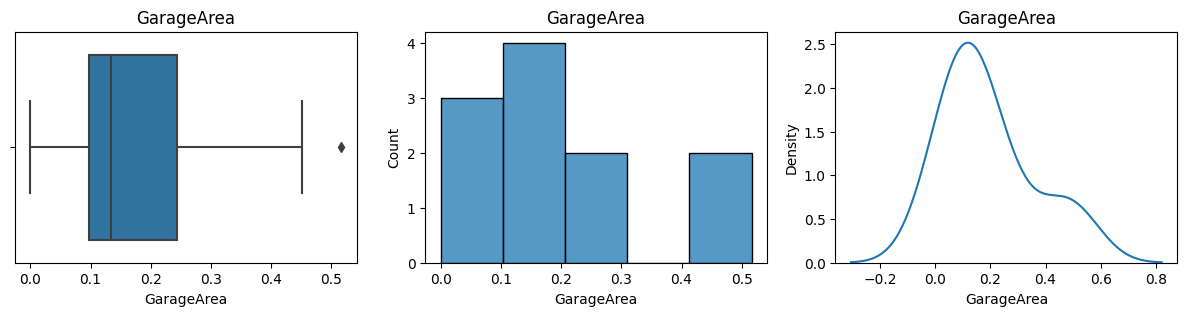

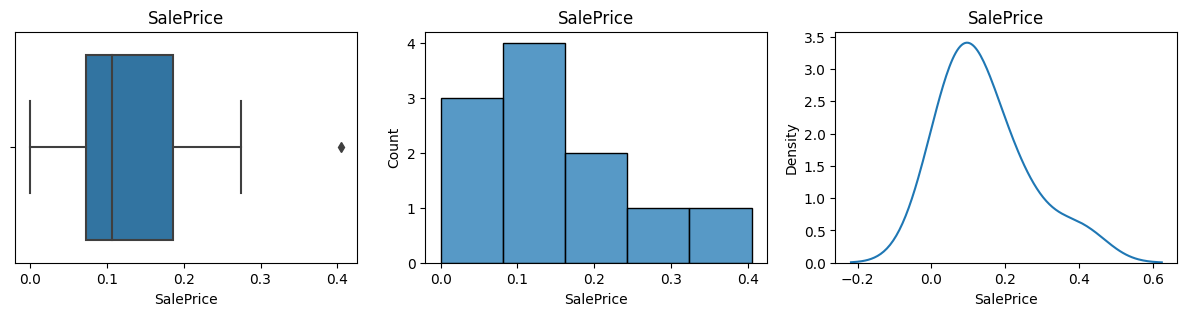

In [62]:
for col in tmp[high_correlation_var].corr().columns:
    tmp_log_df[col] = np.log1p(tmp_log_df[col] - np.min(tmp_log_df[col]))
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    sns.boxplot(data=tmp_log_df, x=col, ax=ax1)
    sns.histplot(data=tmp_log_df, x=col, ax=ax2)
    sns.kdeplot(data=tmp_log_df, x=col, ax=ax3)
    ax1.set_title(col)
    ax2.set_title(col)
    ax3.set_title(col)
    plt.show()

In [63]:
for col in tmp[high_correlation_var].corr().columns:
    print("{0:20s} : {1:10.5f}".format(col, skew(tmp[col])))

OverallQual          :    0.21672
YearBuilt            :   -0.61283
YearRemodAdd         :   -0.50304
TotalBsmtSF          :    0.23230
GrLivArea            :   -0.00699
FullBath             :    0.03652
TotRmsAbvGrd         :    0.67565
GarageYrBlt          :   -0.66749
GarageCars           :   -0.34220
GarageArea           :   -0.32790
SalePrice            :    0.12121


### Data pre-processing

In [107]:
# Data encoding
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   float64
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [135]:
df_oh = pd.get_dummies(tmp, columns=cat_var)

In [136]:
tmp

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,10.427531,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,10.596445,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,10.807340,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,10.589519,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,11.124530,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,10.341536,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,12.072541
1456,20,RL,11.018398,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,12.254863
1457,70,RL,10.517089,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,12.493130
1458,20,RL,10.612516,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,11.864462


In [137]:
df_oh

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,LowQualFinSF,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,10.427531,7,5,2003,2003,3.243669e+18,15.235368,0,198.284295,0,...,1,0,0,0,0,0,0,0,0,0
1,10.596445,6,8,1976,1976,0.000000e+00,16.750863,0,264.601145,0,...,0,0,0,0,0,0,0,0,0,0
2,10.807340,7,5,2001,2002,6.515698e+17,13.632899,0,209.206786,0,...,1,0,0,0,0,0,0,0,0,0
3,10.589519,7,5,1915,1970,0.000000e+00,10.593524,0,180.779930,0,...,0,1,0,0,0,0,0,0,0,0
4,11.124530,8,5,2000,2000,4.327077e+20,14.902456,0,246.150776,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,10.341536,6,5,1999,2000,0.000000e+00,0.000000,0,214.761031,0,...,1,0,0,0,0,0,0,0,0,0
1456,11.018398,6,6,1978,1988,4.865338e+16,15.745375,163,307.053998,0,...,0,0,0,0,0,0,0,0,0,0
1457,10.517089,7,9,1941,2006,0.000000e+00,11.439834,0,247.268017,0,...,0,1,0,0,0,0,0,0,0,0
1458,10.612516,5,6,1950,1996,0.000000e+00,6.325471,1029,235.365160,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
len(cat_var)

40

In [139]:
result = [i for i in cat_var if i in df_oh.columns]
len(result)

0

In [140]:
for var in cat_var:
    if(var in list(df_oh.columns)):
        df_oh.drop(var, axis=1, inplace=True)
df_oh.shape

(1460, 286)

In [141]:
df_oh.shape

(1460, 286)

### Data scaling

In [142]:
target = df_oh['SalePrice']

In [143]:
variables = df_oh.drop('SalePrice', axis=1)

In [144]:
variables.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,LowQualFinSF,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10.524159,6.099315,5.575342,1971.267808,1984.865753,1.815990e+23,9.585676,46.549315,227.656989,5.844521,...,0.204795,0.041096,0.010959,0.039726,0.013699,0.035616,0.059589,0.043151,0.006849,0.020548
std,0.684708,1.382997,1.112799,30.202904,20.645407,4.536253e+24,7.086354,161.319273,72.724356,48.623081,...,0.403690,0.198580,0.104145,0.195382,0.116277,0.185395,0.236805,0.203266,0.082505,0.141914
min,8.025002,1.000000,1.000000,1872.000000,1950.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.279607,5.000000,5.000000,1954.000000,1967.000000,0.000000e+00,0.000000,0.000000,187.805957,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.579554,6.000000,5.000000,1973.000000,1994.000000,0.000000e+00,12.685519,0.000000,221.178164,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.848369,7.000000,6.000000,2000.000000,2004.000000,8.850460e+17,15.274878,0.000000,270.225865,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.926126,10.000000,9.000000,2010.000000,2010.000000,1.659761e+26,27.162515,1474.000000,852.174681,572.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
log_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
            'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

In [146]:
for col in log_cols:
    skew_old = skew(variables[col])
    variables[col] = np.log1p(variables[col])
    print("{0:20s} : {1:10.5f} | {2:10.5f}".format(col, skew_old, skew(variables[col])))

OverallQual          :    0.21672 |   -0.59037
YearBuilt            :   -0.61283 |   -0.64047
YearRemodAdd         :   -0.50304 |   -0.51048
TotalBsmtSF          :    0.23230 |   -5.23197
GrLivArea            :   -0.00699 |   -0.14575
FullBath             :    0.03652 |   -0.39423
TotRmsAbvGrd         :    0.67565 |   -0.05820
GarageCars           :   -0.34220 |   -1.36881
GarageArea           :   -0.32790 |   -3.50728


## Scaling standard scaler

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
feature_scaled = variables.copy()

In [149]:
cont_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
            'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

In [150]:
scaler = StandardScaler()
feature_scaled[cont_cols] = scaler.fit_transform(variables[cont_cols])

In [151]:
variables.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,LowQualFinSF,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10.524159,1.940309,5.575342,7.586821,7.593756,1.815990e+23,9.585676,46.549315,5.285153,5.844521,...,0.204795,0.041096,0.010959,0.039726,0.013699,0.035616,0.059589,0.043151,0.006849,0.020548
std,0.684708,0.201983,1.112799,0.015389,0.010424,4.536253e+24,7.086354,161.319273,0.892456,48.623081,...,0.403690,0.198580,0.104145,0.195382,0.116277,0.185395,0.236805,0.203266,0.082505,0.141914
min,8.025002,0.693147,1.000000,7.535297,7.576097,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.279607,1.791759,5.000000,7.578145,7.584773,0.000000e+00,0.000000,0.000000,5.240720,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.579554,1.945910,5.000000,7.587817,7.598399,0.000000e+00,12.685519,0.000000,5.403480,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.848369,2.079442,6.000000,7.601402,7.603399,8.850460e+17,15.274878,0.000000,5.602952,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.926126,2.397895,9.000000,7.606387,7.606387,1.659761e+26,27.162515,1474.000000,6.748964,572.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
feature_scaled

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,LowQualFinSF,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,10.427531,0.689072,5,1.045180,0.877541,3.243669e+18,15.235368,0,0.010737,0,...,1,0,0,0,0,0,0,0,0,0
1,10.596445,0.027742,8,0.163445,-0.424186,0.000000e+00,16.750863,0,0.332727,0,...,0,0,0,0,0,0,0,0,0,0
2,10.807340,0.689072,5,0.980275,0.829642,6.515698e+17,13.632899,0,0.070547,0,...,1,0,0,0,0,0,0,0,0,0
3,10.589519,0.689072,5,-1.873790,-0.715872,0.000000e+00,10.593524,0,-0.092312,0,...,0,1,0,0,0,0,0,0,0,0
4,11.124530,1.272406,5,0.947798,0.733773,4.327077e+20,14.902456,0,0.252026,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,10.341536,0.027742,5,0.915305,0.733773,0.000000e+00,0.000000,0,0.099779,0,...,1,0,0,0,0,0,0,0,0,0
1456,11.018398,0.027742,6,0.229170,0.156540,4.865338e+16,15.745375,163,0.498931,0,...,0,0,0,0,0,0,0,0,0,0
1457,10.517089,0.689072,9,-0.997641,1.021093,0.000000e+00,11.439834,0,0.257082,0,...,0,1,0,0,0,0,0,0,0,0
1458,10.612516,-0.735707,6,-0.697090,0.541748,0.000000e+00,6.325471,1029,0.202011,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, target, test_size=0.25, random_state=0)

In [154]:
len(y_train)

1095

In [155]:
len(y_test)

365

### Training and validating the models

#### Linear regression

Ridge = Linear Regression + L2 Regularization

#### Cross validation

In [156]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [157]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
val_scores = []
tr_scores = []
estimators = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(X_train)):
    X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    
    model = LinearRegression()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    val_score = mean_squared_error(y_val, y_pred, squared=False)
    tr_pred = model.predict(X_tr)
    tr_score = mean_squared_error(y_tr, tr_pred, squared=False)
    
    val_scores.append(val_score)
    tr_scores.append(tr_score)
    estimators.append(model)
    
    print("{} iteration".format(i+1))
    print("Training score : {0:.5f} | Validation score : {1:.5f}".format(tr_score, val_score))
    
print(np.mean(tr_scores), np.mean(val_scores)) 

1 iteration
Training score : 0.40606 | Validation score : 0.39008
2 iteration
Training score : 0.39451 | Validation score : 0.43566
3 iteration
Training score : 0.40228 | Validation score : 0.53940
4 iteration
Training score : 0.40005 | Validation score : 0.41502
5 iteration
Training score : 0.40795 | Validation score : 0.38223
0.4021714139757516 0.43247819903354034


## Non Linear Regression (Polynomial)

In [159]:
from sklearn.preprocessing import PolynomialFeatures

In [163]:
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X_train)

In [164]:
X_train.shape, poly_X.shape, type(X_train), type(poly_X)

((1095, 285), (1095, 41041), pandas.core.frame.DataFrame, numpy.ndarray)

In [166]:
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
val_scores = []
tr_scores = []
estimators = []
for i, (tr_idx, val_idx) in enumerate(kfold.split(poly_X)):
    X_tr, X_val = poly_X[tr_idx], poly_X[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    
    model = LinearRegression()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    val_score = mean_squared_error(y_val, y_pred, squared=False)
    tr_pred = model.predict(X_tr)
    tr_score = mean_squared_error(y_tr, tr_pred, squared=False)
    
    val_scores.append(val_score)
    tr_scores.append(tr_score)
    estimators.append(model)
    
    print("{} iteration".format(i+1))
    print("Training score : {0:.5f} | Validation score : {1:.5f}".format(tr_score, val_score))
    
print(np.mean(tr_scores), np.mean(val_scores)) 

1 iteration
Training score : 0.39947 | Validation score : 1.24933
2 iteration
Training score : 0.40421 | Validation score : 0.40113
3 iteration
Training score : 0.39638 | Validation score : 0.43093
4 iteration
Training score : 0.40996 | Validation score : 0.37666
5 iteration
Training score : 0.40443 | Validation score : 0.39981
0.40289218039944535 0.5715721651894078


### Hyper parameter tuning

In [168]:
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
for alpha in [0., 1.0, 5.0, 10.0, 50.0]:
    val_scores = []
    tr_scores = []
    estimators = []
    for i, (tr_idx, val_idx) in enumerate(kfold.split(poly_X)):
        X_tr, X_val = poly_X[tr_idx], poly_X[val_idx]
        y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

        model = Ridge(alpha=alpha)
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        val_score = mean_squared_error(y_val, y_pred, squared=False)
        tr_pred = model.predict(X_tr)
        tr_score = mean_squared_error(y_tr, tr_pred, squared=False)

        val_scores.append(val_score)
        tr_scores.append(tr_score)
        estimators.append(model)

        print("{} iteration".format(i+1))
        print("Training score : {0:.5f} | Validation score : {1:.5f}".format(tr_score, val_score))

    print(np.mean(tr_scores), np.mean(val_scores)) 

C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


1 iteration
Training score : 0.39950 | Validation score : 1.36756


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


2 iteration
Training score : 0.40422 | Validation score : 0.40122


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


3 iteration
Training score : 0.41235 | Validation score : 0.43118


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


4 iteration
Training score : 0.42609 | Validation score : 0.37697


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


5 iteration
Training score : 0.41205 | Validation score : 0.39994
0.4108416985065667 0.5953746794758478


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


1 iteration
Training score : 0.39950 | Validation score : 1.36756


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


2 iteration
Training score : 0.40422 | Validation score : 0.40122


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


3 iteration
Training score : 0.41235 | Validation score : 0.43118


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


4 iteration
Training score : 0.42609 | Validation score : 0.37697


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


5 iteration
Training score : 0.41205 | Validation score : 0.39994
0.4108416985065667 0.5953746794758478


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


1 iteration
Training score : 0.39950 | Validation score : 1.36756


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


2 iteration
Training score : 0.40422 | Validation score : 0.40122


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


3 iteration
Training score : 0.41235 | Validation score : 0.43118


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


4 iteration
Training score : 0.42609 | Validation score : 0.37697


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


5 iteration
Training score : 0.41205 | Validation score : 0.39994
0.4108416985065667 0.5953746794758478


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


1 iteration
Training score : 0.39950 | Validation score : 1.36756


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


2 iteration
Training score : 0.40422 | Validation score : 0.40122


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


3 iteration
Training score : 0.41235 | Validation score : 0.43118


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


4 iteration
Training score : 0.42609 | Validation score : 0.37697


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


5 iteration
Training score : 0.41205 | Validation score : 0.39994
0.4108416985065667 0.5953746794758478


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


1 iteration
Training score : 0.39950 | Validation score : 1.36756


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


2 iteration
Training score : 0.40422 | Validation score : 0.40122


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


3 iteration
Training score : 0.41235 | Validation score : 0.43118


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


4 iteration
Training score : 0.42609 | Validation score : 0.37697


C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


5 iteration
Training score : 0.41205 | Validation score : 0.39994
0.4108416985065667 0.5953746794758478


### Grid Search

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [170]:
model = ElasticNet()

In [171]:
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X_train)

In [172]:
params = {"alpha":[0.01, 0.05, 0.1, 1, 10], "l1_ratio":[0.1, 0.5, 1.0]}

In [173]:
grid = GridSearchCV(model, param_grid= params, cv=5, scoring='neg_root_mean_squared_error')

In [175]:
grid.fit(poly_X, y_train)

C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.075e-01, tolerance: 1.445e-02
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.795e-01, tolerance: 1.387e-02
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.146e+00, tolerance: 1.472e-02
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.170e+00, tolerance: 1.486e-02
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.609e+00, tolerance: 1.387e-02
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.746e+00, tolerance: 1.347e-02
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.700e+00, tolerance: 1.486e-02
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.796e+00, tolerance: 1.445e-02
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\regressionenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 1, 10],
                         'l1_ratio': [0.1, 0.5, 1.0]},
             scoring='neg_root_mean_squared_error')

In [176]:
grid_df = pd.DataFrame(grid.cv_results_)

In [177]:
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.713724,0.156644,0.023682,0.003334,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-13.293124,-4777.262987,-11735.987487,-82814.389461,-2260.907788,-20320.368169,31493.821025,5
1,18.671360,0.403864,0.028693,0.005615,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-38.050041,-841.570858,-23909.123486,-31250.137972,-394.419695,-11286.660411,13506.583945,4
2,18.391757,0.134670,0.024332,0.001125,0.01,1.0,"{'alpha': 0.01, 'l1_ratio': 1.0}",-29.552742,-526.683126,-2624.763823,-32122.336925,-782.617981,-7217.190919,12483.472675,2
3,18.565057,0.320021,0.024529,0.002450,0.05,0.1,"{'alpha': 0.05, 'l1_ratio': 0.1}",-37.944817,-852.508394,-15062.857567,-31733.555425,-405.804837,-9618.534208,12427.550880,3
4,18.307669,0.118437,0.023207,0.002145,0.05,0.5,"{'alpha': 0.05, 'l1_ratio': 0.5}",-19.456914,-441.667724,-103325.326773,-6768.478720,-767.881172,-22264.562261,40605.829345,6
5,18.334195,0.089559,0.030449,0.005894,0.05,1.0,"{'alpha': 0.05, 'l1_ratio': 1.0}",-15.802351,-458.810197,-210589.271328,-7624.259354,-932.799911,-43924.188628,83379.109695,7
6,18.497238,0.383719,0.026216,0.001427,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-29.517682,-533.142618,-111.998078,-31358.663358,-783.731129,-6563.410573,12400.692450,1
7,19.067706,0.812038,0.025697,0.003479,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-15.802307,-457.629901,-210603.708460,-7639.148452,-932.878875,-43929.833599,83383.700018,8
8,18.423932,0.151791,0.027584,0.003153,0.1,1.0,"{'alpha': 0.1, 'l1_ratio': 1.0}",-14.168335,-499.529652,-259696.487029,-22607.213538,-997.422992,-56762.964309,101827.722626,10
9,18.454560,0.130706,0.024897,0.002567,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-14.167727,-499.140743,-259611.824350,-22609.118087,-997.822536,-56746.414689,101793.849181,9
